### The 712 Slice Scans' metadata are corruted

In [26]:
import os
from preprocessing import load_folder_paths, load_dcm_datasets

folder_paths = load_folder_paths(scan_size='large')
dts = []
for f_i, folder in enumerate(folder_paths[:1]):
    datasets = load_dcm_datasets(folder)
    print(f"Processing folder {f_i}")
    # Read dicom files in folder
    ts = []
    print(datasets[0].SeriesDescription)
    for i in range(0, len(datasets) - 8, 8):
        # print(f"Dataset {i} time: {datasets[i].AcquisitionTime}")
        # Convert hhmmss.sss format into seconds
        hms, ms = datasets[i].AcquisitionTime.split('.')
        h, m, s = hms[:2], hms[2:4], hms[4:]
        t = int(h) * 3600 + int(m) * 60 + float(s) + float(ms[:3]) / 1000
        # print(f"t: {t}")
        ts.append(t)
    for i in range(1, len(ts)):
        dts.append(round(ts[i] - ts[i-1], 2))

Dicom files loaded, count: 712
Processing folder 0
PERFUSIONE


In [15]:
print(max(dts), min(dts))


0.0 0.0


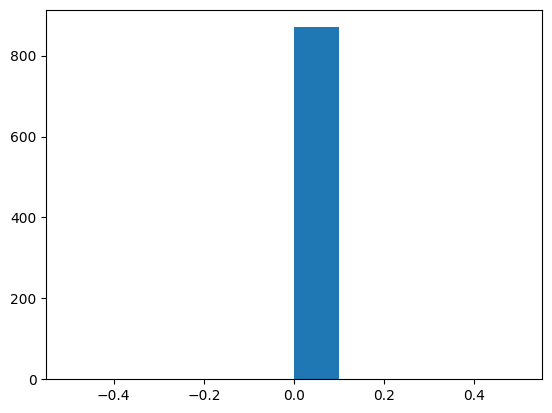

In [16]:
import matplotlib.pyplot as plt
plt.hist(dts)
plt.show()

### Let's do the same with the small scans

In [27]:
import os
from preprocessing import load_folder_paths, load_dcm_datasets

folder_paths = load_folder_paths(scan_size='small')
dts = []
for f_i, folder in enumerate(folder_paths[:10]):
    datasets = load_dcm_datasets(folder)
    print(f"Processing folder {f_i}")
    print(datasets[0].SeriesDescription)
    # Read dicom files in folder
    ts = []
    for i in range(0, len(datasets) - 16, 16):
        # print(f"Dataset {i} time: {datasets[i].AcquisitionTime}")
        # Convert hhmmss.sss format into seconds
        hms, ms = datasets[i].AcquisitionTime.split('.')
        h, m, s = hms[:2], hms[2:4], hms[4:]
        t = int(h) * 3600 + int(m) * 60 + float(s) + float(ms[:3]) / 1000
        # print(f"t: {t}")
        ts.append(t)
    for i in range(1, len(ts)):
        dts.append(round(ts[i] - ts[i-1], 2))

Dicom files loaded, count: 288
Processing folder 0
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 1
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 2
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 3
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 4
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 5
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 6
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 7
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 8
PERFUSIONE 8 CM
Dicom files loaded, count: 288
Processing folder 9
PERFUSIONE 8 CM


2.81 2.81


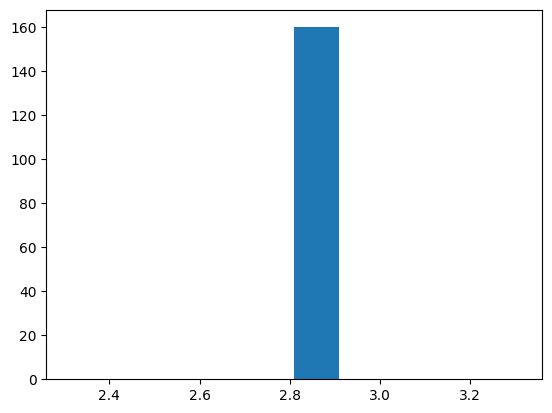

In [28]:
import matplotlib.pyplot as plt
print(max(dts), min(dts))
plt.hist(dts)
plt.show()

In [32]:
print(f"Temporal resolution: {1/2.81} scans per second")

Temporal resolution: 0.35587188612099646 scans per second


These work!
### Let's look at acquisition params like
- Tube Current and Voltage
- Patient Position

In [36]:
import os
from preprocessing import load_folder_paths, load_dcm_datasets

folder_paths = load_folder_paths(scan_size='small')
tube_currents = []
tube_voltages = []
for f_i, folder in enumerate(folder_paths[:10]):
    datasets = load_dcm_datasets(folder)
    print(f"Processing folder {f_i}")
    tube_currents.append([])
    tube_voltages.append([])
    for i in range(0, len(datasets) - 16, 16):
        tube_currents[f_i].append(datasets[i].XRayTubeCurrent)
        tube_voltages[f_i].append(datasets[i].KVP)

print(max(tube_currents), min(tube_currents))
print(max(tube_voltages), min(tube_voltages))

Dicom files loaded, count: 288
Processing folder 0
Dicom files loaded, count: 288
Processing folder 1
Dicom files loaded, count: 288
Processing folder 2
Dicom files loaded, count: 288
Processing folder 3
Dicom files loaded, count: 288
Processing folder 4
Dicom files loaded, count: 288
Processing folder 5
Dicom files loaded, count: 288
Processing folder 6
Dicom files loaded, count: 288
Processing folder 7
Dicom files loaded, count: 288
Processing folder 8
Dicom files loaded, count: 288
Processing folder 9
['500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500'] ['500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500', '500']
['80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0'] ['80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', '80.0', 

In [25]:
datasets[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 232
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.267612077112667338922329381331105328063
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
(0002, 0016) Source Application Entity Title     AE: 'CDSDicomSCP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20190217'
(0008, 00

In [13]:
%cd ..
from preprocessing import load_folder_paths, load_dcm_datasets
print(len(load_folder_paths('small')))
print(len(load_folder_paths('large')))

/Users/simonma/Documents/ComputerScience/GitHub/PCTVolumePred/src
142
115


In [20]:
import os
dataset_path = os.path.expanduser('~/Desktop/UniToBrain')
l = []
for folder in os.listdir(dataset_path):
    if len(folder) == 7:
        l.append(os.path.join(dataset_path, folder))
print(set(l) - set(load_folder_paths('small')) - set(load_folder_paths('large')))
len(l)

{'/Users/simonma/Desktop/UniToBrain/MOL-210'}


258

In [22]:
from preprocessing import get_volume
d = get_volume('/Users/simonma/Desktop/UniToBrain/MOL-210',
               windowing=False,
               filter=False,
               correct_motion=False,
               reference_index=0,
               spatial_downsampling_factor=4,
               temporal_downsampling_factor=1,
               verbose=False)



Dicom files loaded, count: 356
10 [0.488281, 0.488281]


ic| label_count: array([45865,    42,  3243,     2])


Info: Downsampling detected (4x), adjusting morphology_shape_2d from (1, 2) to (1, 2)
Info: Downsampling detected (4x), adjusting remove_small_objects_size from 500 to 31
get_3d_mask took 0.13392901420593262 seconds


In [23]:
d.shape

(118, 3, 128, 128)